# ** Xebia Part I: Exploratory Data Analysis**
0. **General description of the data sets**
    1. shape
    2. missing
1. **Numerical/Continuous Features**
    1. pair plot
    2. data quality
    3. pair plot after cleanning
    4. correlation
2. **Categorical Features**: 
    1. product_type
    2. quality
    3. put them together

In [1]:
# laod packages 
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. General description of the data sets

In [2]:
# laod train 
df_train = pd.read_csv('../data/mower_market_snapshot.csv',sep=';',na_values='unknown')
df_train['data_set'] = 'train'
# drop potential leak features
df_train = df_train.drop(["id",'market_share'],axis=1) 
target = df_train.loc[:,'attractiveness']
df_train_droped = df_train.drop(['attractiveness'],axis=1)
# load test
df_test = pd.read_csv('../data/submission_set.csv',sep=';')
df_test['data_set'] = 'test'
df_test = df_test.drop(["id"],axis=1)
# put them together
df = pd.concat([df_train_droped,df_test],ignore_index=True)
print(df_train.shape)
print(df_test.shape)

(1399, 10)
(600, 9)


In [3]:
df_train.head(2)

,capacity,failure_rate,margin,price,prod_cost,product_type,quality,warranty,attractiveness,data_set
0,10.492623,0.042528,633.766584,828.802103,195.035519,auto-portee,Low,3ans,0.650648,train
1,20.273730,0.037896,731.576817,882.894916,151.318099,auto-portee,Low,3 ans.,0.699792,train


In [4]:
# check if there is some missing
df.isnull().sum()

capacity         0
failure_rate     0
margin           0
price            0
prod_cost       31
product_type     0
quality          0
warranty         0
data_set         0
dtype: int64

## 2. Numerical/Continuous Features

### Preprocessing Warrant

In [5]:
df_train['warranty'] = df_train['warranty'].str[0].astype(int)
df['warranty'] = df['warranty'].str[0].astype(int)

### Pair plot 

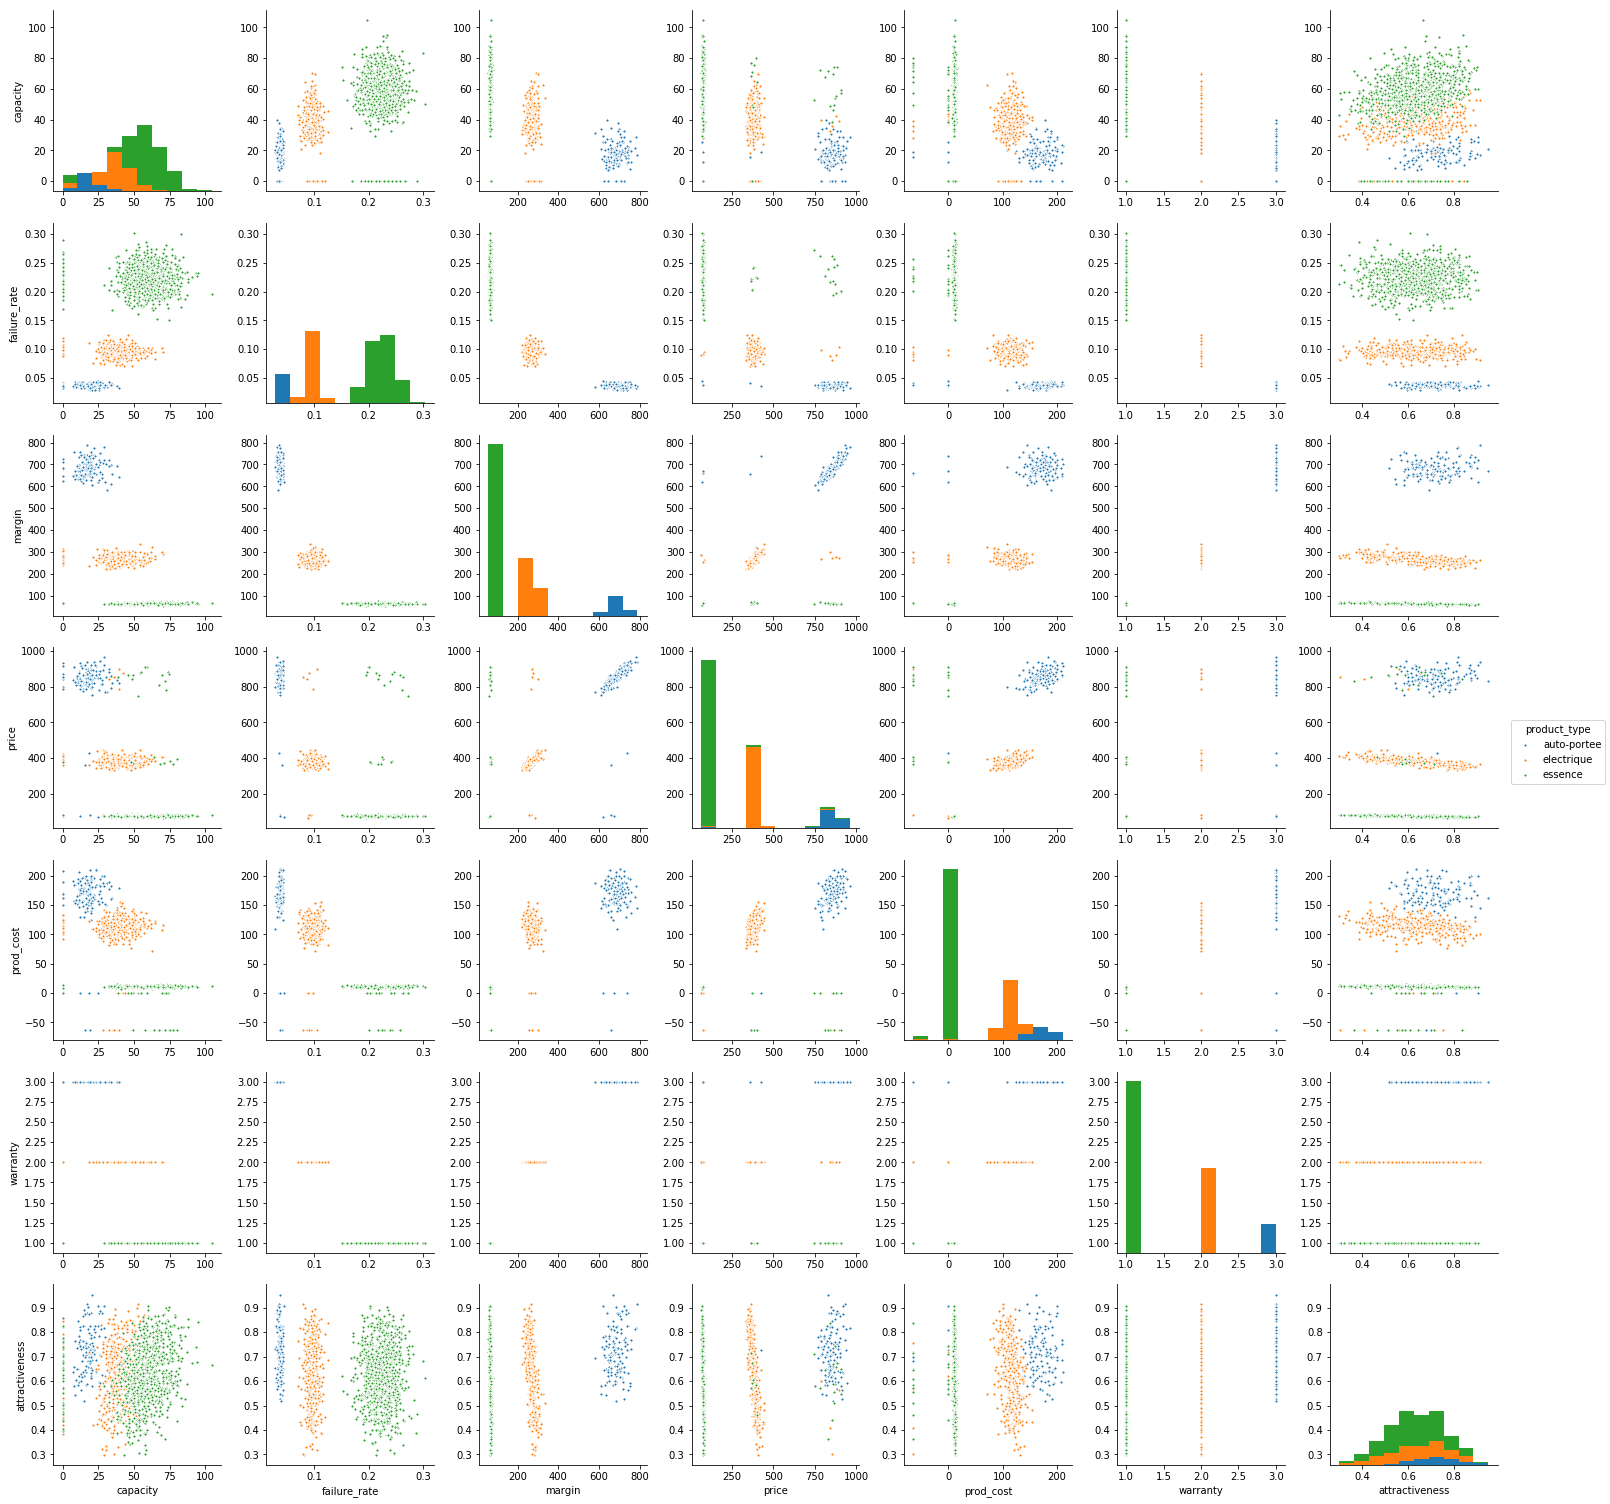

In [6]:
sns.pairplot(df_train.dropna(),size=3,hue="product_type",plot_kws={"s": 10})

### data quality

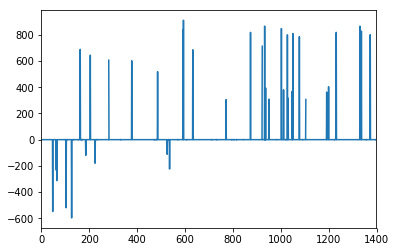

In [7]:
# seems for some data price not equals to prod_cost + margin
(df_train["price"] - df_train["prod_cost"]-df_train["margin"] ).plot()

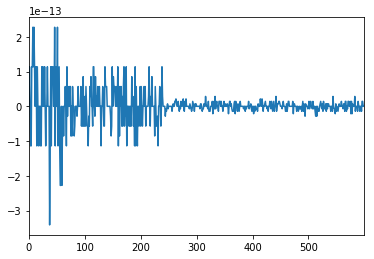

In [8]:
# no "outliers" in test data
(df_test["price"] - df_test["prod_cost"]-df_test["margin"] ).plot()

In [9]:
# we drop the outliers 
df_train = df_train.loc[np.abs(df_train["price"] - df_train["prod_cost"]-df_train["margin"] )<1]

### Pair plot  after cleaning

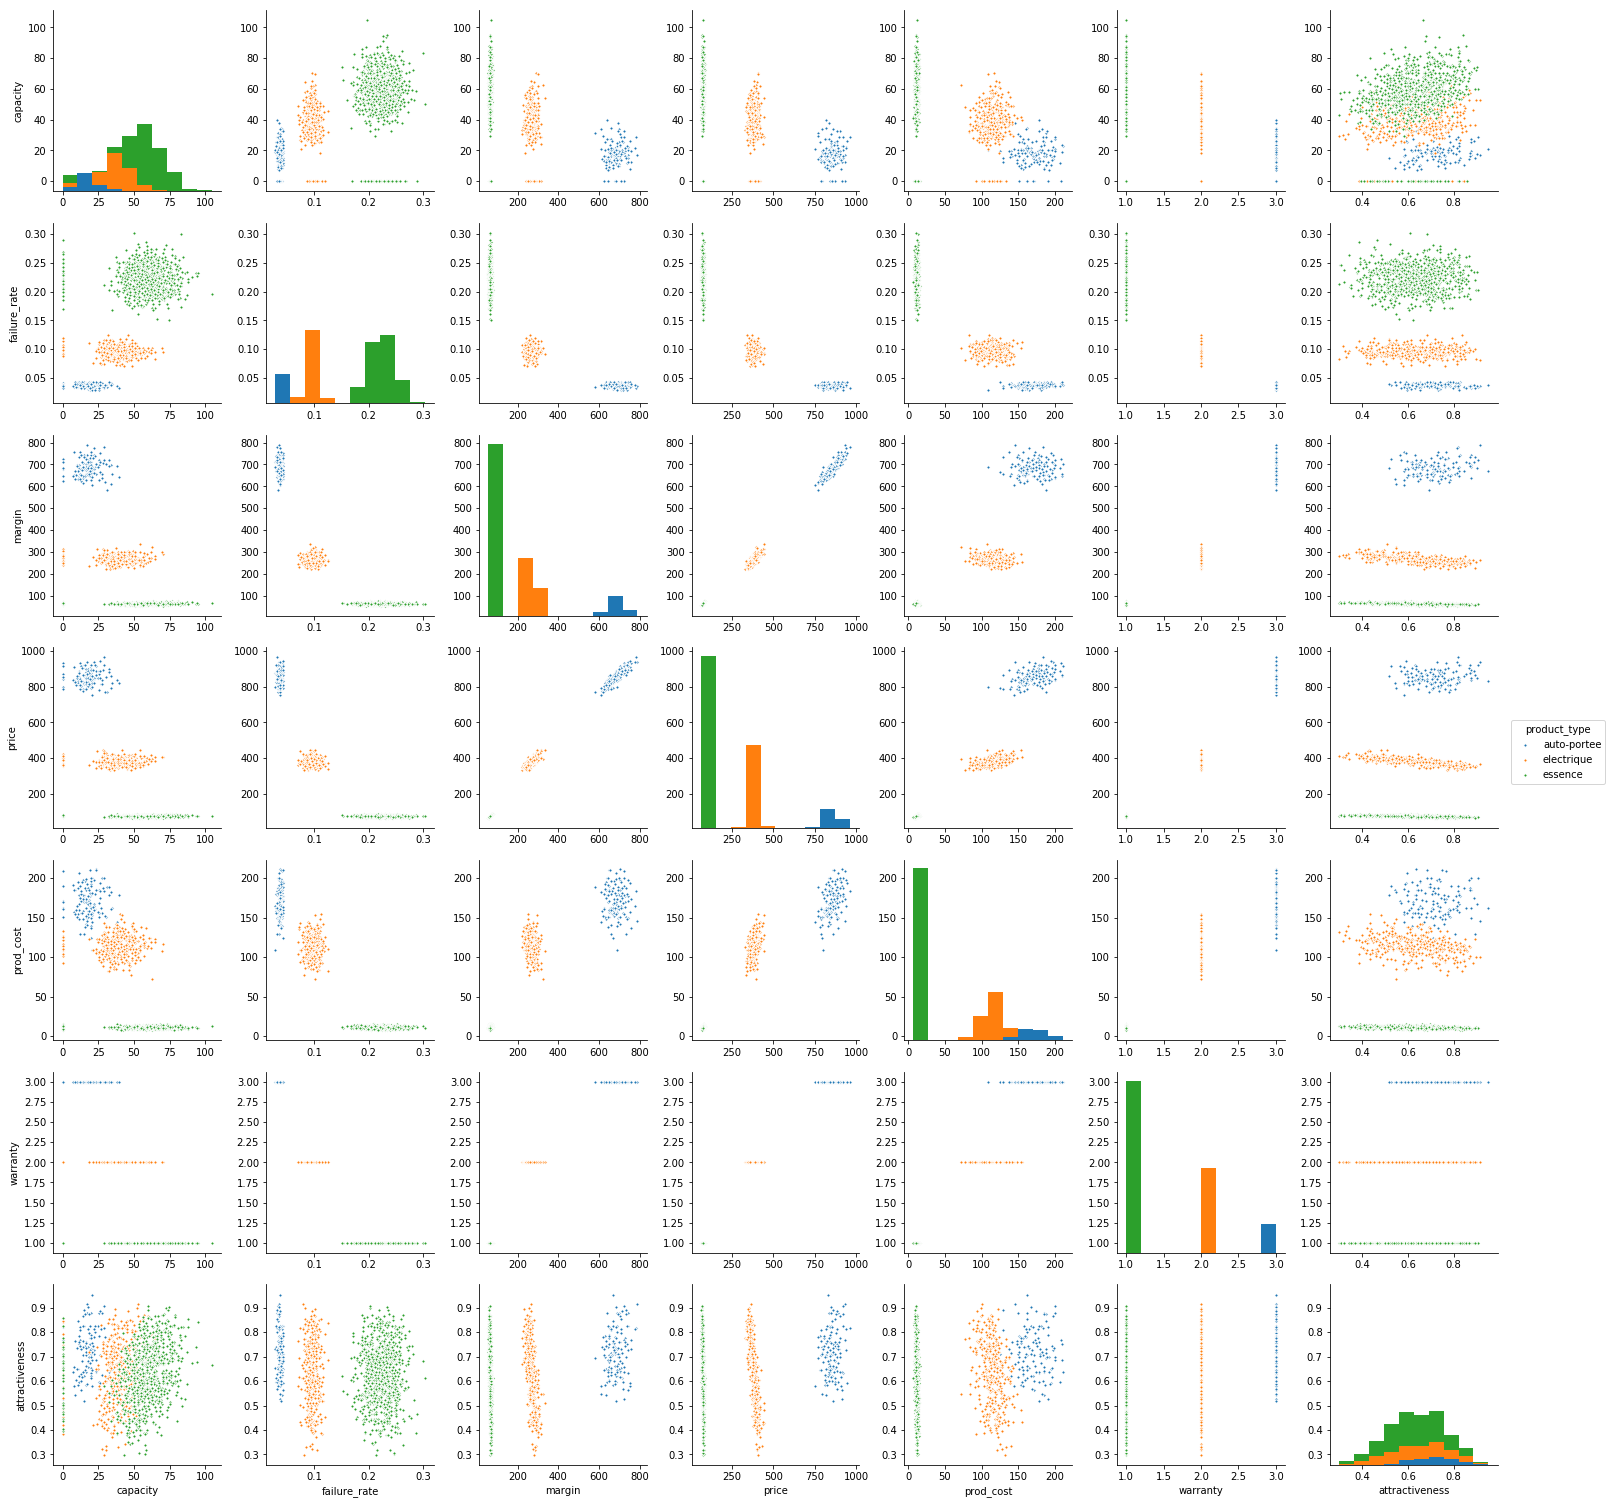

In [10]:
sns.pairplot(df_train.dropna(),size=3,hue="product_type",plot_kws={"s": 10})

1. failure_rate margin price and warranty is very correlated with each other they have strong link with product_type
2. capacity is a little bit less depends on product type and 0 capacity seems an defaut missing value
3. no features have strong correlation with attractiveness

### Correlation

In [11]:
df_train.corr()

,capacity,failure_rate,margin,price,prod_cost,warranty,attractiveness
capacity,1.000000,0.619561,-0.639557,-0.650199,-0.638837,-0.658139,0.043987
failure_rate,0.619561,1.000000,-0.880805,-0.913777,-0.954681,-0.949340,-0.146296
margin,-0.639557,-0.880805,1.000000,0.994827,0.909714,0.970993,0.182786
price,-0.650199,-0.913777,0.994827,1.000000,0.947190,0.988352,0.172440
prod_cost,-0.638837,-0.954681,0.909714,0.947190,1.000000,0.974815,0.127861
warranty,-0.658139,-0.949340,0.970993,0.988352,0.974815,1.000000,0.180378
attractiveness,0.043987,-0.146296,0.182786,0.172440,0.127861,0.180378,1.000000


The observation in pair plot is confirmed

## 3. Categorical Features

### product_type

Text(0.5,1,'box plot')

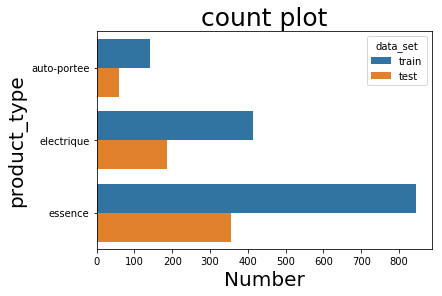

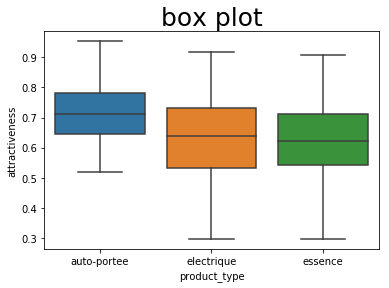

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(y = 'product_type', hue='data_set', data=df,orient = 'v')
plt.title("count plot", fontsize = 25)
plt.ylabel('product_type', fontsize = 20)
plt.xlabel('Number', fontsize = 20)
plt.figure(figsize=(6,4))
sns.boxplot(x='product_type',y='attractiveness',data=df_train)
plt.title("box plot", fontsize = 25)

Essence is the most present type in the train data. auto-portee has in average more attractiveness than the others

### quality

Text(0.5,1,'box plot')

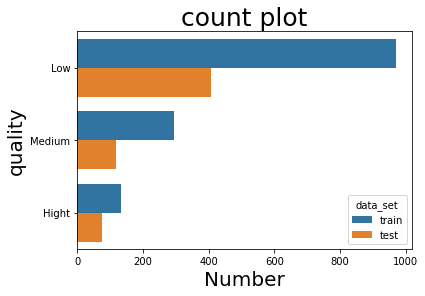

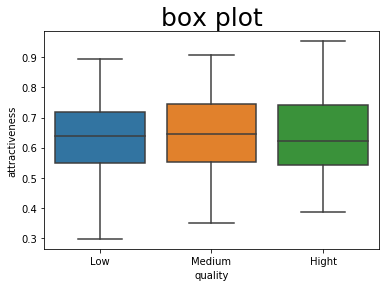

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(y = 'quality', hue = 'data_set',data=df, orient = 'v')
plt.title("count plot", fontsize = 25)
plt.ylabel('quality', fontsize = 20)
plt.xlabel('Number', fontsize = 20)

plt.figure(figsize=(6,4))
sns.boxplot(x='quality',y='attractiveness',data=df_train)
plt.title("box plot", fontsize = 25)

Most of the product has low quality. Similar attractiveness for the 3 categories 

### Put them together

Text(0.5,1,'box plot')

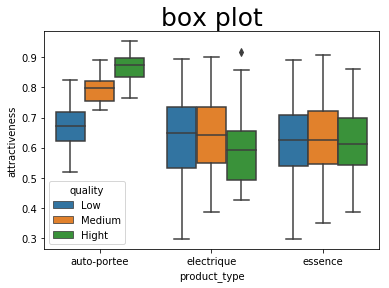

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='product_type', y='attractiveness', hue='quality', data=df_train)
plt.title("box plot", fontsize = 25)

Quality is very discriminative for auto-portee product. The attractiveness is "positively correlated" with quality for auto portee while negatively correlated in other 2 types